In [96]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [97]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [98]:
data = pd.read_csv("argentina.csv", encoding = "utf-8")

In [99]:
data.corr(method='spearman')

<ipython-input-99-d276310a42d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='spearman')


,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
gdp,1.000000,-0.340486,-0.505364,-0.323546,-0.198193,-0.287408,-0.304606,0.649915,0.298701,0.474873
illiteracy,-0.340486,1.000000,0.616036,0.376623,0.701863,0.714286,0.332863,0.214003,-0.767363,-0.391304
poverty,-0.505364,0.616036,1.000000,0.354037,0.399209,0.660079,0.301780,-0.028797,-0.734613,-0.753811
deficient_infra,-0.323546,0.376623,0.354037,1.000000,0.128176,0.471485,0.057643,-0.093168,-0.392434,-0.462451
school_dropout,-0.198193,0.701863,0.399209,0.128176,1.000000,0.454545,0.393332,0.224167,-0.462451,-0.121400
no_healthcare,-0.287408,0.714286,0.660079,0.471485,0.454545,1.000000,0.370726,0.246753,-0.809147,-0.547149
birth_mortal,-0.304606,0.332863,0.301780,0.057643,0.393332,0.370726,1.000000,0.002826,-0.170105,-0.152020
pop,0.649915,0.214003,-0.028797,-0.093168,0.224167,0.246753,0.002826,1.000000,-0.252400,0.171090
movie_theatres_per_cap,0.298701,-0.767363,-0.734613,-0.392434,-0.462451,-0.809147,-0.170105,-0.252400,1.000000,0.630717
doctors_per_cap,0.474873,-0.391304,-0.753811,-0.462451,-0.121400,-0.547149,-0.152020,0.171090,0.630717,1.000000


In [100]:
data.head(2)

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.38324,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.34414,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [101]:
data['pbi_per_cap'] = np.round(data['gdp'] / data['pop'], 3)
data.drop(columns=['pop', 'gdp', 'movie_theatres_per_cap', 'doctors_per_cap', 'poverty', 'deficient_infra','school_dropout', 'no_healthcare', 'birth_mortal'], inplace=True)

print(data.sort_values(by='pbi_per_cap').head(25))

               province  illiteracy  pbi_per_cap
7               Formosa    4.610640        7.181
3            Corrientes    5.602420        8.027
12             Misiones    6.863950        8.757
4                 Chaco    7.517580        9.318
21              Tucumán    3.770370        9.568
20  Santiago del Estero    6.272090        9.597
8                 Jujuy    2.151390        9.631
15                Salta    3.346090       11.066
16             San Juan    2.963260       12.132
14            Río Negro    2.031420       16.072
1             Catamarca    2.344140       16.722
10             La Rioja    2.773210       16.756
6            Entre Ríos    3.185580       16.783
0          Buenos Aires    1.383240       18.732
11              Mendoza    2.200200       19.225
2               Córdoba    2.714140       20.963
9              La Pampa    1.539300       21.916
19             Santa Fe    1.975940       25.540
17             San Luis    3.433650       27.251
5                Chu

In [102]:
data.corr(method='spearman')

<ipython-input-102-d276310a42d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='spearman')


,illiteracy,pbi_per_cap
illiteracy,1.000000,-0.778656
pbi_per_cap,-0.778656,1.000000


In [103]:
df_rounded = data[['illiteracy', 'pbi_per_cap']].round(0).astype(int)

In [104]:
df_rounded['provincia'] = data['province']

In [105]:
df_rounded = df_rounded[['provincia', 'illiteracy', 'pbi_per_cap']]

In [106]:
df_rounded

,provincia,illiteracy,pbi_per_cap
0,Buenos Aires,1,19
1,Catamarca,2,17
2,Córdoba,3,21
3,Corrientes,6,8
4,Chaco,8,9
5,Chubut,2,35
6,Entre Ríos,3,17
7,Formosa,5,7
8,Jujuy,2,10
9,La Pampa,2,22


In [107]:
scaler = MinMaxScaler()

# Escalar las variables de analfabetismo y PBI per cápita
data['Illiteracy_Scaled'] = scaler.fit_transform(data[['illiteracy']])
data['PBI_per_capita_Scaled'] = scaler.fit_transform(data[['pbi_per_cap']])

# Mostrar el DataFrame con las variables escaladas
print(data[['province', 'illiteracy', 'Illiteracy_Scaled', 'pbi_per_cap', 'PBI_per_capita_Scaled']])

               province  illiteracy  Illiteracy_Scaled  pbi_per_cap  \
0          Buenos Aires    1.383240           0.087979       18.732   
1             Catamarca    2.344140           0.230840       16.722   
2               Córdoba    2.714140           0.285850       20.963   
3            Corrientes    5.602420           0.715264        8.027   
4                 Chaco    7.517580           1.000000        9.318   
5                Chubut    1.548060           0.112484       34.861   
6            Entre Ríos    3.185580           0.355941       16.783   
7               Formosa    4.610640           0.567812        7.181   
8                 Jujuy    2.151390           0.202183        9.631   
9              La Pampa    1.539300           0.111181       21.916   
10             La Rioja    2.773210           0.294632       16.756   
11              Mendoza    2.200200           0.209440       19.225   
12             Misiones    6.863950           0.902822        8.757   
13    

In [108]:
# Definir los límites y etiquetas para los intervalos
# bins = [-0.1, 0.33, 0.66, 1]
# labels = ['Bajo', 'Medio', 'Alto']

bins = [-0.1, 0.20, 0.30, 0.60, 1]
# labels = ['Bajo', 'Medio-Bajo', 'Medio', 'Medio-Alto', 'Alto']
labels = [1, 2, 3, 4]

# Aplicar el binning a la columna de analfabetismo escalado
data['illiteracy_Category'] = pd.cut(data['Illiteracy_Scaled'], bins=bins, labels=labels)
data['PBI_Category'] = pd.cut(data['PBI_per_capita_Scaled'], bins=bins, labels=labels)


In [109]:
# bins = [-0.1, 0.2, 0.5, 0.6, 0.8, 1]
# labels = [5, 4, 3, 2, 1]

# data['PBI_Category'] = pd.cut(data['PBI_per_capita_Scaled'], bins=bins, labels=labels)

In [110]:
# data = data.drop(columns='cluster').sort_values(['illiteracy_Category', 'PBI_Category']).reset_index()

In [111]:
data

,province,illiteracy,pbi_per_cap,Illiteracy_Scaled,PBI_per_capita_Scaled,illiteracy_Category,PBI_Category
0,Buenos Aires,1.383240,18.732,0.087979,0.326364,1,3
1,Catamarca,2.344140,16.722,0.230840,0.269573,2,2
2,Córdoba,2.714140,20.963,0.285850,0.389399,2,3
3,Corrientes,5.602420,8.027,0.715264,0.023903,4,1
4,Chaco,7.517580,9.318,1.000000,0.060379,4,1
5,Chubut,1.548060,34.861,0.112484,0.782076,1,4
6,Entre Ríos,3.185580,16.783,0.355941,0.271297,3,2
7,Formosa,4.610640,7.181,0.567812,0.000000,3,1
8,Jujuy,2.151390,9.631,0.202183,0.069223,2,1
9,La Pampa,1.539300,21.916,0.111181,0.416325,1,3


In [112]:
data['situación'] = data['PBI_Category'].astype(int)-data['illiteracy_Category'].astype(int)

In [113]:
data = data.sort_values(['situación'])
data

,province,illiteracy,pbi_per_cap,Illiteracy_Scaled,PBI_per_capita_Scaled,illiteracy_Category,PBI_Category,situación
3,Corrientes,5.602420,8.027,0.715264,0.023903,4,1,-3
4,Chaco,7.517580,9.318,1.000000,0.060379,4,1,-3
12,Misiones,6.863950,8.757,0.902822,0.044529,4,1,-3
20,Santiago del Estero,6.272090,9.597,0.814827,0.068262,4,1,-3
21,Tucumán,3.770370,9.568,0.442885,0.067443,3,1,-2
16,San Juan,2.963260,12.132,0.322888,0.139886,3,1,-2
15,Salta,3.346090,11.066,0.379805,0.109767,3,1,-2
7,Formosa,4.610640,7.181,0.567812,0.000000,3,1,-2
6,Entre Ríos,3.185580,16.783,0.355941,0.271297,3,2,-1
8,Jujuy,2.151390,9.631,0.202183,0.069223,2,1,-1


In [114]:
df_rounded.corr(method='spearman')

<ipython-input-114-a5053a2c0b0b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_rounded.corr(method='spearman')


,illiteracy,pbi_per_cap
illiteracy,1.000000,-0.741524
pbi_per_cap,-0.741524,1.000000


In [115]:
A = list(data['illiteracy_Category'])
B = list(data['PBI_Category'])

In [116]:
print(set(A))

{1, 2, 3, 4}


In [117]:
print(set(B))

{1, 2, 3, 4}


In [118]:
R = zip(A, B)

In [119]:
R = list(R)

In [120]:
print(R)

[(4, 1), (4, 1), (4, 1), (4, 1), (3, 1), (3, 1), (3, 1), (3, 1), (3, 2), (2, 1), (3, 3), (2, 2), (2, 2), (1, 2), (2, 3), (2, 3), (1, 3), (1, 3), (1, 3), (1, 4), (1, 4), (1, 4)]


In [121]:
print(set(R))

{(1, 3), (1, 2), (2, 1), (3, 1), (1, 4), (2, 3), (3, 3), (2, 2), (3, 2), (4, 1)}


In [122]:
pairs = []

for index, row in data.iterrows():
    province = row['province']
    illiteracy_category = row['illiteracy_Category']
    pbi_category = row['PBI_Category']

    pairs.append((province, province))

    if illiteracy_category != pbi_category:
        pairs.append((province, province))
        pairs.append((province, pbi_category))
        pairs.append((pbi_category, pbi_category))

print(pairs)

[('Corrientes', 'Corrientes'), ('Corrientes', 'Corrientes'), ('Corrientes', 1), (1, 1), ('Chaco', 'Chaco'), ('Chaco', 'Chaco'), ('Chaco', 1), (1, 1), ('Misiones', 'Misiones'), ('Misiones', 'Misiones'), ('Misiones', 1), (1, 1), ('Santiago del Estero', 'Santiago del Estero'), ('Santiago del Estero', 'Santiago del Estero'), ('Santiago del Estero', 1), (1, 1), ('Tucumán', 'Tucumán'), ('Tucumán', 'Tucumán'), ('Tucumán', 1), (1, 1), ('San Juan', 'San Juan'), ('San Juan', 'San Juan'), ('San Juan', 1), (1, 1), ('Salta', 'Salta'), ('Salta', 'Salta'), ('Salta', 1), (1, 1), ('Formosa', 'Formosa'), ('Formosa', 'Formosa'), ('Formosa', 1), (1, 1), ('Entre Ríos', 'Entre Ríos'), ('Entre Ríos', 'Entre Ríos'), ('Entre Ríos', 2), (2, 2), ('Jujuy', 'Jujuy'), ('Jujuy', 'Jujuy'), ('Jujuy', 1), (1, 1), ('San Luis', 'San Luis'), ('La Rioja', 'La Rioja'), ('Catamarca', 'Catamarca'), ('Río Negro', 'Río Negro'), ('Río Negro', 'Río Negro'), ('Río Negro', 2), (2, 2), ('Córdoba', 'Córdoba'), ('Córdoba', 'Córdoba'),

In [123]:
grouped_B = data.groupby(['illiteracy_Category', 'PBI_Category'])

print(grouped_B['province'])

In [124]:
df = pd.DataFrame({'A': A, 'B': B})

grouped_B = df.groupby('A')['B'].apply(list).to_dict()

print(grouped_B)


{1: [2, 3, 3, 3, 4, 4, 4], 2: [1, 2, 2, 3, 3], 3: [1, 1, 1, 1, 2, 3], 4: [1, 1, 1, 1]}


In [125]:
grouped_B

{1: [2, 3, 3, 3, 4, 4, 4],
 2: [1, 2, 2, 3, 3],
 3: [1, 1, 1, 1, 2, 3],
 4: [1, 1, 1, 1]}

In [126]:
corr_mat = data.drop(columns=['province']).corr(method='spearman')
print(corr_mat)

                       illiteracy  pbi_per_cap  Illiteracy_Scaled  \
illiteracy               1.000000    -0.778656           1.000000   
pbi_per_cap             -0.778656     1.000000          -0.778656   
Illiteracy_Scaled        1.000000    -0.778656           1.000000   
PBI_per_capita_Scaled   -0.778656     1.000000          -0.778656   
situación               -0.932434     0.903331          -0.932434   

                       PBI_per_capita_Scaled  situación  
illiteracy                         -0.778656  -0.932434  
pbi_per_cap                         1.000000   0.903331  
Illiteracy_Scaled                  -0.778656  -0.932434  
PBI_per_capita_Scaled               1.000000   0.903331  
situación                           0.903331   1.000000  


<ipython-input-126-f1c72b93ffa3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.drop(columns=['province']).corr(method='spearman')


Cluster 0:
['Entre Ríos', 'San Luis', 'La Rioja', 'Catamarca', 'Río Negro', 'Córdoba', 'Mendoza', 'La Pampa', 'Santa Fe', 'Buenos Aires']

Cluster 1:
['Tucumán', 'San Juan', 'Salta', 'Formosa', 'Jujuy']

Cluster 2:
['Corrientes', 'Chaco', 'Misiones', 'Santiago del Estero']

Cluster 3:
['Neuquén', 'Chubut', 'Santa Cruz']



Text(0.5, 1.0, 'Clustering K-means')

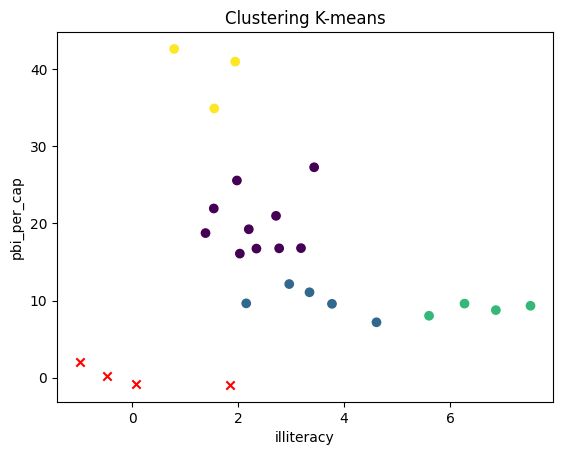

In [127]:
X = data[['illiteracy', 'pbi_per_cap']].values

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(init='random', n_clusters=4, n_init=10, max_iter=300, random_state=99)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# data

data['cluster'] = kmeans.labels_.astype('object')

# show provinces of each cluster
for c in range(4):
    print('Cluster ' + str(c) + ':')
    print(data[data.cluster==c].province.value_counts().index.tolist())
    print()


plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('illiteracy')
plt.ylabel('pbi_per_cap')
plt.title('Clustering K-means')
# plt.show()

In [128]:
data.sort_values('cluster')

,province,illiteracy,pbi_per_cap,Illiteracy_Scaled,PBI_per_capita_Scaled,illiteracy_Category,PBI_Category,situación,cluster
17,San Luis,3.433650,27.251,0.392823,0.567061,3,3,0,0
0,Buenos Aires,1.383240,18.732,0.087979,0.326364,1,3,2,0
19,Santa Fe,1.975940,25.540,0.176098,0.518718,1,3,2,0
9,La Pampa,1.539300,21.916,0.111181,0.416325,1,3,2,0
6,Entre Ríos,3.185580,16.783,0.355941,0.271297,3,2,-1,0
11,Mendoza,2.200200,19.225,0.209440,0.340293,2,3,1,0
10,La Rioja,2.773210,16.756,0.294632,0.270534,2,2,0,0
1,Catamarca,2.344140,16.722,0.230840,0.269573,2,2,0,0
14,Río Negro,2.031420,16.072,0.184347,0.251208,1,2,1,0
2,Córdoba,2.714140,20.963,0.285850,0.389399,2,3,1,0


PRODUCTO CARTESIANO

In [129]:
product_list = list(product(data['province'], data['cluster']))

In [130]:
product_list

[('Corrientes', 2),
 ('Corrientes', 2),
 ('Corrientes', 2),
 ('Corrientes', 2),
 ('Corrientes', 1),
 ('Corrientes', 1),
 ('Corrientes', 1),
 ('Corrientes', 1),
 ('Corrientes', 0),
 ('Corrientes', 1),
 ('Corrientes', 0),
 ('Corrientes', 0),
 ('Corrientes', 0),
 ('Corrientes', 0),
 ('Corrientes', 0),
 ('Corrientes', 0),
 ('Corrientes', 0),
 ('Corrientes', 0),
 ('Corrientes', 0),
 ('Corrientes', 3),
 ('Corrientes', 3),
 ('Corrientes', 3),
 ('Chaco', 2),
 ('Chaco', 2),
 ('Chaco', 2),
 ('Chaco', 2),
 ('Chaco', 1),
 ('Chaco', 1),
 ('Chaco', 1),
 ('Chaco', 1),
 ('Chaco', 0),
 ('Chaco', 1),
 ('Chaco', 0),
 ('Chaco', 0),
 ('Chaco', 0),
 ('Chaco', 0),
 ('Chaco', 0),
 ('Chaco', 0),
 ('Chaco', 0),
 ('Chaco', 0),
 ('Chaco', 0),
 ('Chaco', 3),
 ('Chaco', 3),
 ('Chaco', 3),
 ('Misiones', 2),
 ('Misiones', 2),
 ('Misiones', 2),
 ('Misiones', 2),
 ('Misiones', 1),
 ('Misiones', 1),
 ('Misiones', 1),
 ('Misiones', 1),
 ('Misiones', 0),
 ('Misiones', 1),
 ('Misiones', 0),
 ('Misiones', 0),
 ('Misiones', 

RELACIÓN

In [131]:
relacion_1 = data.groupby('cluster')['province']

for i in relacion_1:
  print(i[0], list(list(i)[1]))

0 ['Entre Ríos', 'San Luis', 'La Rioja', 'Catamarca', 'Río Negro', 'Córdoba', 'Mendoza', 'La Pampa', 'Santa Fe', 'Buenos Aires']
1 ['Tucumán', 'San Juan', 'Salta', 'Formosa', 'Jujuy']
2 ['Corrientes', 'Chaco', 'Misiones', 'Santiago del Estero']
3 ['Neuquén', 'Chubut', 'Santa Cruz']


Sea R:A -> B; Rc AxB

A (Conjunto de partida) = a provincias
b (Conjunto de llegada, codominio de la relacion a)

Dom(R) = {xEA: existe yEB tal que (x, y )ER}
Conjunto de elementos de A que se relacionan con algun elemento de B

"Existe una provincia en A: existe un valor de pbipercap tal que (provincia, pbi) pertenece a la Relación.

Img(R): elementos de B que estan relacionados con un elemento de A

La tabla nos muestra la relación A -> B, siendo a el conjunto que contiene las provincias y B el conjunto que contiene los valores de PBI para cada provincia.

Por lo que su dominio será:
Dom(R)=

In [132]:
for c in range(4):
    print('Cluster ' + str(c) + ':')
    print(data[data.cluster==c].province.value_counts().index.tolist())
    print()


Cluster 0:
['Entre Ríos', 'San Luis', 'La Rioja', 'Catamarca', 'Río Negro', 'Córdoba', 'Mendoza', 'La Pampa', 'Santa Fe', 'Buenos Aires']

Cluster 1:
['Tucumán', 'San Juan', 'Salta', 'Formosa', 'Jujuy']

Cluster 2:
['Corrientes', 'Chaco', 'Misiones', 'Santiago del Estero']

Cluster 3:
['Neuquén', 'Chubut', 'Santa Cruz']



In [133]:
Zona1 = ['Chubut', 'Neuquén', 'Santa Cruz']

Zona2 = ['Entre Ríos', 'Formosa', 'Jujuy', 'Salta', 'San Juan', 'Tucumán']

Zona3 = ['Corrientes', 'Chaco', 'Misiones', 'Santiago del Estero']

Zona4 = ['Buenos Aires', 'Catamarca', 'Córdoba', 'La Pampa', 'La Rioja', 'Mendoza', 'Río Negro', 'San Luis', 'Santa Fe']

In [134]:
R1 = list(product(Zona1, Zona1))
R2 = list(product(Zona2, Zona2))
R3 = list(product(Zona3, Zona3))
R4 = list(product(Zona4, Zona4))

In [135]:
print(R1+R2+R3+R4)

[('Chubut', 'Chubut'), ('Chubut', 'Neuquén'), ('Chubut', 'Santa Cruz'), ('Neuquén', 'Chubut'), ('Neuquén', 'Neuquén'), ('Neuquén', 'Santa Cruz'), ('Santa Cruz', 'Chubut'), ('Santa Cruz', 'Neuquén'), ('Santa Cruz', 'Santa Cruz'), ('Entre Ríos', 'Entre Ríos'), ('Entre Ríos', 'Formosa'), ('Entre Ríos', 'Jujuy'), ('Entre Ríos', 'Salta'), ('Entre Ríos', 'San Juan'), ('Entre Ríos', 'Tucumán'), ('Formosa', 'Entre Ríos'), ('Formosa', 'Formosa'), ('Formosa', 'Jujuy'), ('Formosa', 'Salta'), ('Formosa', 'San Juan'), ('Formosa', 'Tucumán'), ('Jujuy', 'Entre Ríos'), ('Jujuy', 'Formosa'), ('Jujuy', 'Jujuy'), ('Jujuy', 'Salta'), ('Jujuy', 'San Juan'), ('Jujuy', 'Tucumán'), ('Salta', 'Entre Ríos'), ('Salta', 'Formosa'), ('Salta', 'Jujuy'), ('Salta', 'Salta'), ('Salta', 'San Juan'), ('Salta', 'Tucumán'), ('San Juan', 'Entre Ríos'), ('San Juan', 'Formosa'), ('San Juan', 'Jujuy'), ('San Juan', 'Salta'), ('San Juan', 'San Juan'), ('San Juan', 'Tucumán'), ('Tucumán', 'Entre Ríos'), ('Tucumán', 'Formosa'), 

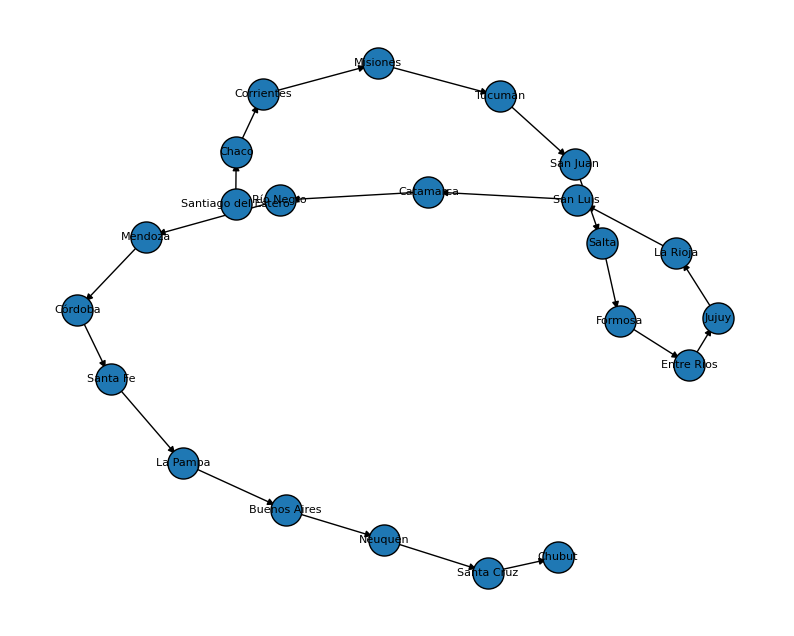

In [136]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido vacío
G = nx.DiGraph()

# Agregar los nodos al grafo
provinces = ['Santiago del Estero', 'Chaco', 'Corrientes', 'Misiones', 'Tucumán', 'San Juan', 'Salta', 'Formosa', 'Entre Ríos',
             'Jujuy', 'La Rioja', 'San Luis', 'Catamarca', 'Río Negro', 'Mendoza', 'Córdoba', 'Santa Fe', 'La Pampa', 'Buenos Aires',
             'Neuquén', 'Santa Cruz', 'Chubut']

G.add_nodes_from(provinces)

# Agregar aristas al grafo
edges = [('Santiago del Estero', 'Chaco'), ('Chaco', 'Corrientes'), ('Corrientes', 'Misiones'), ('Misiones', 'Tucumán'),
         ('Tucumán', 'San Juan'), ('San Juan', 'Salta'), ('Salta', 'Formosa'), ('Formosa', 'Entre Ríos'), ('Entre Ríos', 'Jujuy'),
         ('Jujuy', 'La Rioja'), ('La Rioja', 'San Luis'), ('San Luis', 'Catamarca'), ('Catamarca', 'Río Negro'), ('Río Negro', 'Mendoza'),
         ('Mendoza', 'Córdoba'), ('Córdoba', 'Santa Fe'), ('Santa Fe', 'La Pampa'), ('La Pampa', 'Buenos Aires'), ('Buenos Aires', 'Neuquén'),
         ('Neuquén', 'Santa Cruz'), ('Santa Cruz', 'Chubut')]

G.add_edges_from(edges)

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 8))

# Dibujar el grafo
pos = nx.spring_layout(G)  # Determinar la posición de los nodos
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")

# Configurar los bordes del grafo
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")
plt.axis("off")  # Ocultar los ejes

# Mostrar el grafo
plt.show()

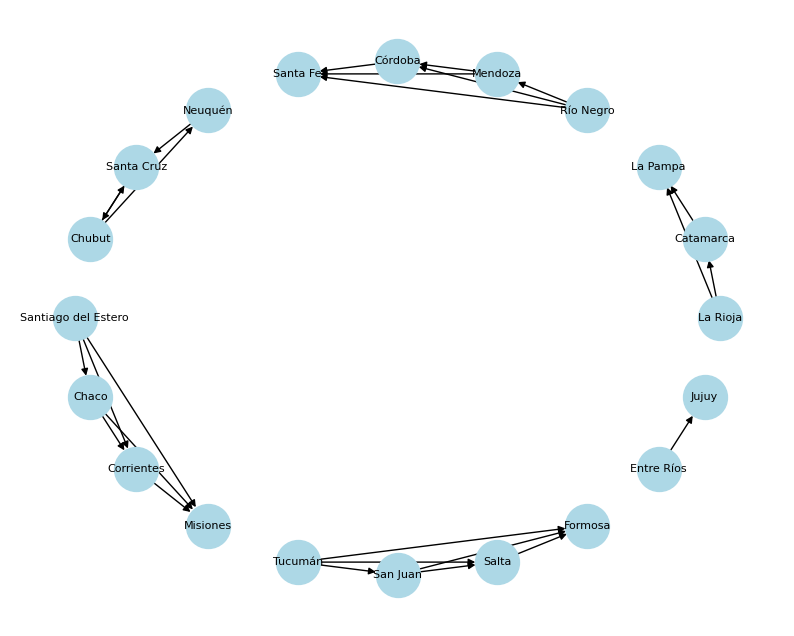

In [137]:
# Crear un grafo dirigido vacío
G = nx.DiGraph()

# Definir las relaciones
relaciones = [('Santiago del Estero', 'Chaco'), ('Santiago del Estero', 'Corrientes'), ('Santiago del Estero', 'Misiones'),
              ('Chaco', 'Corrientes'), ('Chaco', 'Misiones'), ('Corrientes', 'Misiones'),
              ('Tucumán', 'San Juan'), ('Tucumán', 'Salta'), ('Tucumán', 'Formosa'),
              ('San Juan', 'Salta'), ('San Juan', 'Formosa'),
              ('Salta', 'Formosa'),
              ('Entre Ríos', 'Jujuy'), ('La Rioja', 'Catamarca'), ('La Rioja', 'La Pampa'),
              ('Catamarca', 'La Pampa'),
              ('Río Negro', 'Mendoza'), ('Río Negro', 'Córdoba'), ('Río Negro', 'Santa Fe'),
              ('Mendoza', 'Córdoba'), ('Mendoza', 'Santa Fe'),
              ('Córdoba', 'Santa Fe'),
              ('Neuquén', 'Santa Cruz'), ('Chubut', 'Neuquén'), ('Chubut', 'Santa Cruz'),
              ('Santa Cruz', 'Chubut')]

# Agregar las relaciones al grafo
G.add_edges_from(relaciones)

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 8))

# Dibujar el grafo
pos = nx.shell_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=8, font_color='black')

# Establecer los límites del eje y ocultar los ejes
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.axis("off")

# Mostrar el gráfico
plt.show()

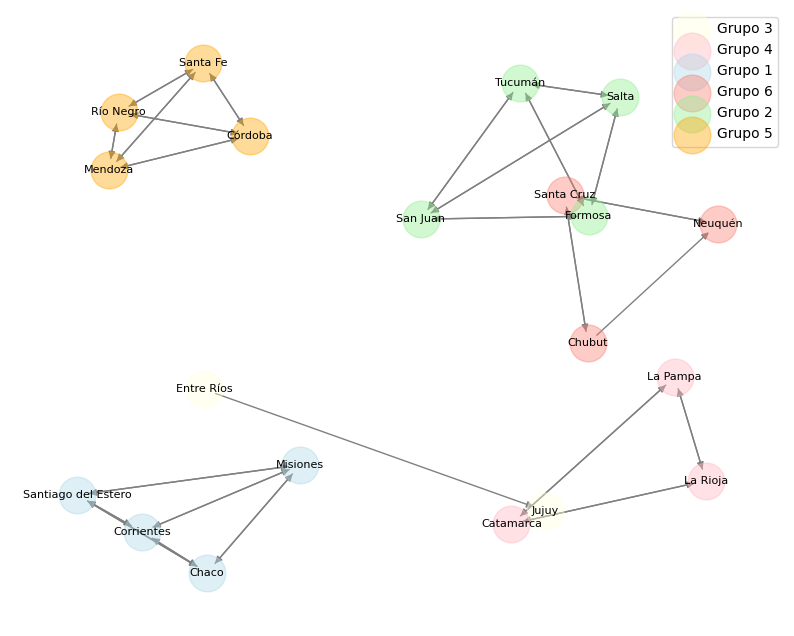

In [138]:
# Crear un grafo dirigido vacío
G = nx.DiGraph()

# Definir las relaciones
relaciones = [('Santiago del Estero', 'Chaco'), ('Santiago del Estero', 'Corrientes'), ('Santiago del Estero', 'Misiones'), ('Chaco', 'Santiago del Estero'), ('Chaco', 'Corrientes'), ('Chaco', 'Misiones'), ('Corrientes', 'Santiago del Estero'), ('Corrientes', 'Chaco'), ('Corrientes', 'Misiones'), ('Misiones', 'Santiago del Estero'), ('Misiones', 'Chaco'), ('Misiones', 'Corrientes'), ('Tucumán', 'San Juan'), ('Tucumán', 'Salta'), ('Tucumán', 'Formosa'), ('San Juan', 'Tucumán'), ('San Juan', 'Salta'), ('San Juan', 'Formosa'), ('Salta', 'Tucumán'), ('Salta', 'San Juan'), ('Salta', 'Formosa'), ('Formosa', 'Tucumán'), ('Formosa', 'San Juan'), ('Formosa', 'Salta'), ('Entre Ríos', 'Jujuy'), ('La Rioja', 'Catamarca'), ('La Rioja', 'La Pampa'), ('Catamarca', 'La Rioja'), ('Catamarca', 'La Pampa'), ('La Pampa', 'La Rioja'), ('La Pampa', 'Catamarca'), ('Río Negro', 'Mendoza'), ('Río Negro', 'Córdoba'), ('Río Negro', 'Santa Fe'), ('Mendoza', 'Río Negro'), ('Mendoza', 'Córdoba'), ('Mendoza', 'Santa Fe'), ('Córdoba', 'Río Negro'), ('Córdoba', 'Mendoza'), ('Córdoba', 'Santa Fe'), ('Santa Fe', 'Río Negro'), ('Santa Fe', 'Mendoza'), ('Santa Fe', 'Córdoba'), ('Neuquén', 'Santa Cruz'), ('Chubut', 'Neuquén'), ('Chubut', 'Santa Cruz'), ('Santa Cruz', 'Neuquén'), ('Santa Cruz', 'Chubut')]

# Agregar las relaciones al grafo
G.add_edges_from(relaciones)

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 8))

# Definir colores para cada grupo
colores = {'Grupo 1': 'lightblue', 'Grupo 2': 'lightgreen', 'Grupo 3': 'lightyellow', 'Grupo 4': 'lightpink', 'Grupo 5': 'orange', 'Grupo 6': 'salmon'}

# Asignar grupos a los nodos
grupos = {'Santiago del Estero': 'Grupo 1', 'Chaco': 'Grupo 1', 'Corrientes': 'Grupo 1', 'Misiones': 'Grupo 1',
          'Tucumán': 'Grupo 2', 'San Juan': 'Grupo 2', 'Salta': 'Grupo 2', 'Formosa': 'Grupo 2',
          'Entre Ríos': 'Grupo 3', 'Jujuy': 'Grupo 3',
          'La Rioja': 'Grupo 4', 'Catamarca': 'Grupo 4', 'La Pampa': 'Grupo 4',
          'Río Negro': 'Grupo 5', 'Mendoza': 'Grupo 5', 'Córdoba': 'Grupo 5', 'Santa Fe': 'Grupo 5',
          'Neuquén': 'Grupo 6', 'Chubut': 'Grupo 6', 'Santa Cruz': 'Grupo 6'}

# Obtener posiciones de los nodos utilizando el algoritmo spring_layout
pos = nx.spring_layout(G, k=1)

# Dibujar los nodos agrupados y coloreados
for grupo in set(grupos.values()):
    nodos_grupo = [nodo for nodo, grupo_nodo in grupos.items() if grupo_nodo == grupo]
    nx.draw_networkx_nodes(G, pos, nodelist=nodos_grupo, node_color=colores[grupo],
                           node_size=700, alpha=0.4, label=grupo)

# Dibujar las flechas de las relaciones
#nx.draw_networkx_edges(G, pos, arrows=True, edge_color='gray', width=1.0, alpha=0.5)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, width=1.0, alpha=1)

# Mostrar etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Mostrar la leyenda
plt.legend(loc='upper right')

# Ocultar los ejes
plt.axis("off")

# Mostrar el gráfico
plt.show()

In [142]:
import itertools

# Obtener todas las provincias del DataFrame
provincias = data['province'].unique()

# Obtener las relaciones
relaciones = []
for a, b in itertools.combinations(provincias, 2):
    a_situacion = data.loc[data['province'] == a, 'situación'].values[0]
    b_situacion = data.loc[data['province'] == b, 'situación'].values[0]
    if abs(a_situacion - b_situacion) <= 1:
        relaciones.append((a, b))
        relaciones.append((b, a))

print(relaciones)

[('Corrientes', 'Chaco'), ('Chaco', 'Corrientes'), ('Corrientes', 'Misiones'), ('Misiones', 'Corrientes'), ('Corrientes', 'Santiago del Estero'), ('Santiago del Estero', 'Corrientes'), ('Corrientes', 'Tucumán'), ('Tucumán', 'Corrientes'), ('Corrientes', 'San Juan'), ('San Juan', 'Corrientes'), ('Corrientes', 'Salta'), ('Salta', 'Corrientes'), ('Corrientes', 'Formosa'), ('Formosa', 'Corrientes'), ('Chaco', 'Misiones'), ('Misiones', 'Chaco'), ('Chaco', 'Santiago del Estero'), ('Santiago del Estero', 'Chaco'), ('Chaco', 'Tucumán'), ('Tucumán', 'Chaco'), ('Chaco', 'San Juan'), ('San Juan', 'Chaco'), ('Chaco', 'Salta'), ('Salta', 'Chaco'), ('Chaco', 'Formosa'), ('Formosa', 'Chaco'), ('Misiones', 'Santiago del Estero'), ('Santiago del Estero', 'Misiones'), ('Misiones', 'Tucumán'), ('Tucumán', 'Misiones'), ('Misiones', 'San Juan'), ('San Juan', 'Misiones'), ('Misiones', 'Salta'), ('Salta', 'Misiones'), ('Misiones', 'Formosa'), ('Formosa', 'Misiones'), ('Santiago del Estero', 'Tucumán'), ('Tuc

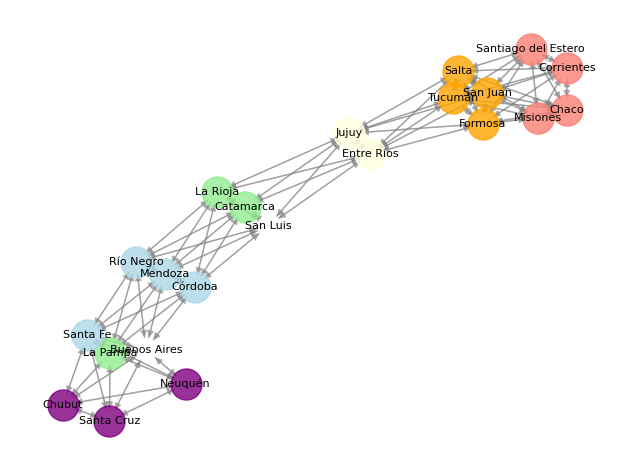

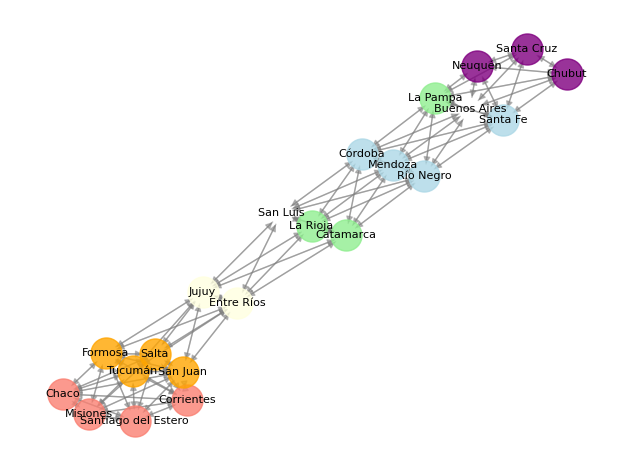

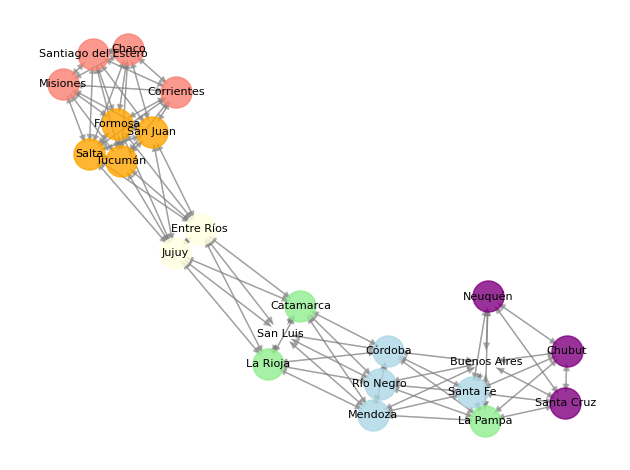

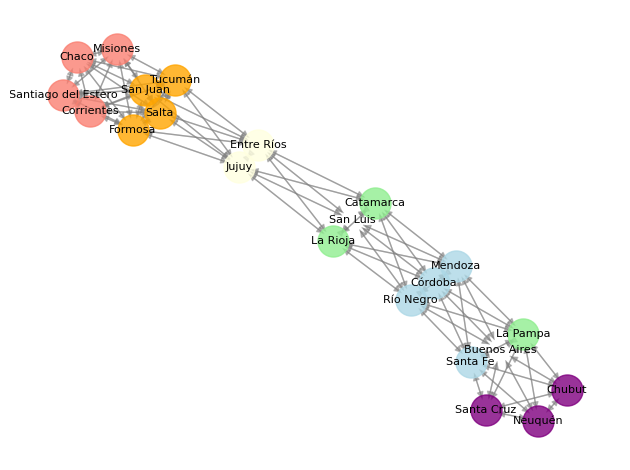

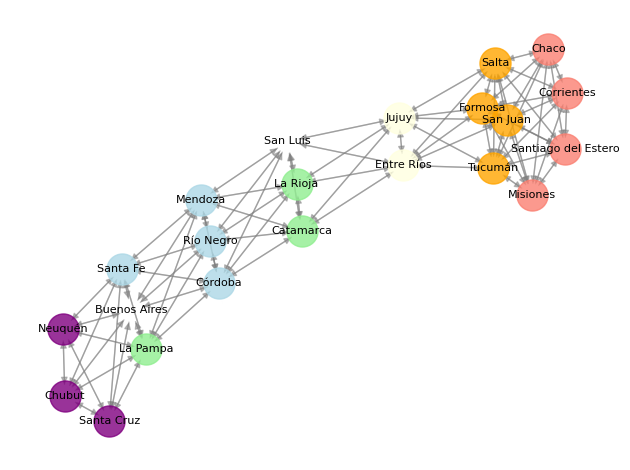

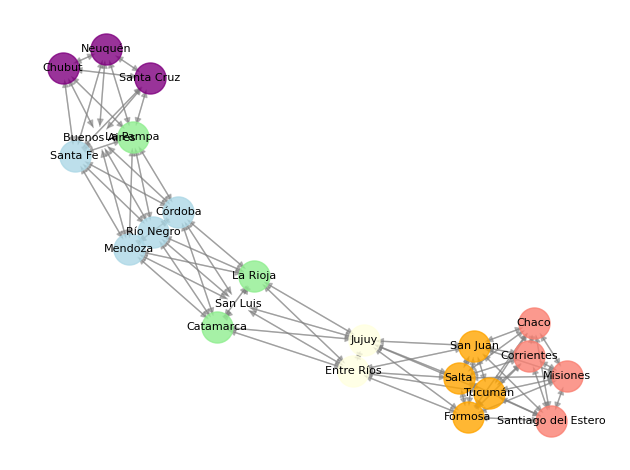

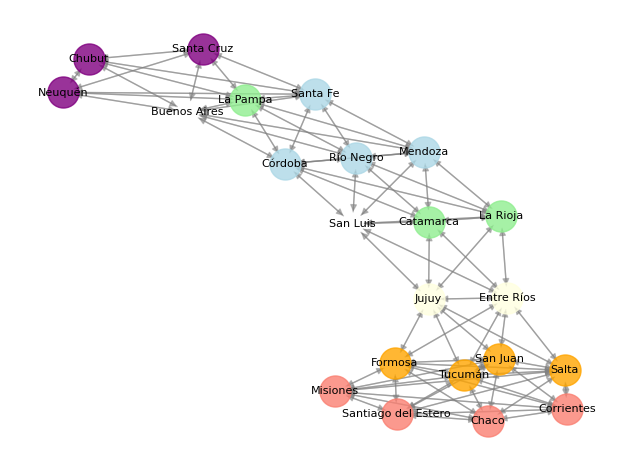

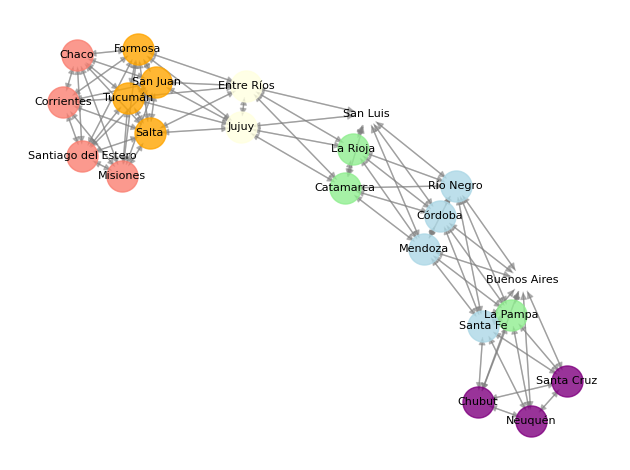

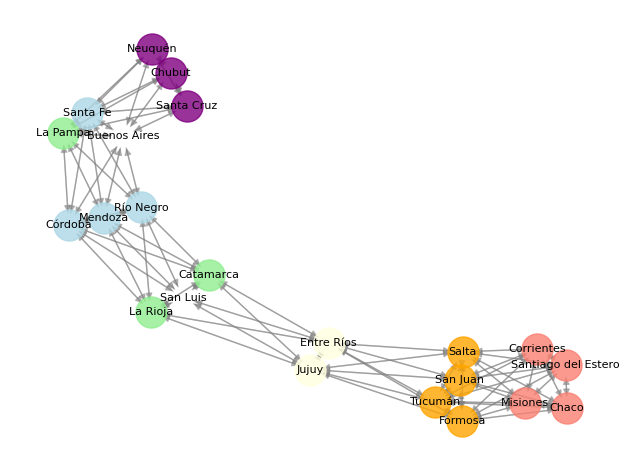

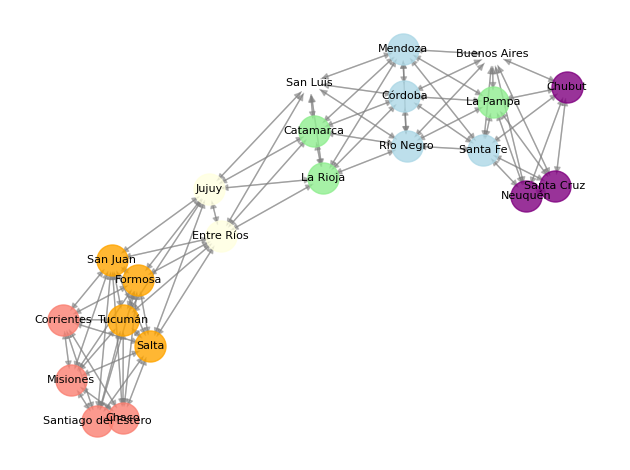

In [143]:
import networkx as nx
import matplotlib.pyplot as plt

for i in range(0, 10):
  # Crear un grafo dirigido vacío
  G = nx.DiGraph()

  # Definir las relaciones
  '''
  relaciones = [('Santiago del Estero', 'Chaco'), ('Santiago del Estero', 'Corrientes'), ('Santiago del Estero', 'Misiones'),
                ('Chaco', 'Santiago del Estero'), ('Chaco', 'Corrientes'), ('Chaco', 'Misiones'),
                ('Corrientes', 'Santiago del Estero'), ('Corrientes', 'Chaco'), ('Corrientes', 'Misiones'),
                ('Misiones', 'Santiago del Estero'), ('Misiones', 'Chaco'), ('Misiones', 'Corrientes'),
                ('Tucumán', 'San Juan'), ('Tucumán', 'Salta'), ('Tucumán', 'Formosa'),
                ('San Juan', 'Tucumán'), ('San Juan', 'Salta'), ('San Juan', 'Formosa'),
                ('Salta', 'Tucumán'), ('Salta', 'San Juan'), ('Salta', 'Formosa'),
                ('Formosa', 'Tucumán'), ('Formosa', 'San Juan'), ('Formosa', 'Salta'),
                ('Entre Ríos', 'Jujuy'), ('La Rioja', 'Catamarca'), ('La Rioja', 'La Pampa'),
                ('Catamarca', 'La Rioja'), ('Catamarca', 'La Pampa'),
                ('La Pampa', 'La Rioja'), ('La Pampa', 'Catamarca'),
                ('Río Negro', 'Mendoza'), ('Río Negro', 'Córdoba'), ('Río Negro', 'Santa Fe'),
                ('Mendoza', 'Río Negro'), ('Mendoza', 'Córdoba'), ('Mendoza', 'Santa Fe'),
                ('Córdoba', 'Río Negro'), ('Córdoba', 'Mendoza'), ('Córdoba', 'Santa Fe'),
                ('Santa Fe', 'Río Negro'), ('Santa Fe', 'Mendoza'), ('Santa Fe', 'Córdoba'),
                ('Neuquén', 'Santa Cruz'), ('Chubut', 'Neuquén'), ('Chubut', 'Santa Cruz'),
                ('Santa Cruz', 'Neuquén'), ('Santa Cruz', 'Chubut')]
'''
  # Agregar las relaciones al grafo
  G.add_edges_from(relaciones)

  # Configurar el tamaño de la figura
  #fig, ax = plt.subplots(figsize=(10, 8))

  # Asignar posiciones a los nodos utilizando spring_layout

  # pos = nx.spectral_layout(G, scale=0.5)
  # pos = nx.spectral_layout(G, dim=2, scale=0.5, center=None, weight=5)
  # pos = nx.planar_layout(G)
  # pos = nx.spring_layout(G, seed=35, k=1, iterations=300)
  pos = nx.spring_layout(G, seed=i, k=2.5, iterations=250, scale=3, center=[1,5])

  # Crear los grupos de nodos
  grupo1 = ['Santiago del Estero', 'Chaco', 'Corrientes', 'Misiones']
  grupo2 = ['Tucumán', 'San Juan', 'Salta', 'Formosa']
  grupo3 = ['Entre Ríos', 'Jujuy',]
  grupo4 = ['La Rioja', 'Catamarca', 'La Pampa']
  grupo5 = ['Río Negro', 'Mendoza', 'Córdoba', 'Santa Fe']
  grupo6 = ['Neuquén', 'Santa Cruz', 'Chubut']

  # Dibujar los nodos de cada grupo con un color diferente
  nx.draw_networkx_nodes(G, pos, nodelist=grupo1, node_color='salmon', node_size=500, alpha=0.8)
  nx.draw_networkx_nodes(G, pos, nodelist=grupo2, node_color='orange', node_size=500, alpha=0.8)
  nx.draw_networkx_nodes(G, pos, nodelist=grupo3, node_color='lightyellow', node_size=500, alpha=0.8)
  nx.draw_networkx_nodes(G, pos, nodelist=grupo4, node_color='lightgreen', node_size=500, alpha=0.8)
  nx.draw_networkx_nodes(G, pos, nodelist=grupo5, node_color='lightblue', node_size=500, alpha=0.8)
  nx.draw_networkx_nodes(G, pos, nodelist=grupo6, node_color='purple', node_size=500, alpha=0.8)

  # Dibujar las flechas de las relaciones
  nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, width=1.0, alpha=0.5)

  # Mostrar etiquetas de los nodos
  nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

  # Ocultar los ejes
  plt.axis('off')

  # Ajustar los límites de la figura
  plt.tight_layout()

  # Mostrar el gráfico
  plt.show()



In [145]:
# Agrupar las provincias por la penúltima columna
grupos = data.groupby('situación')['province'].apply(list)

# Obtener una lista de provincias para cada grupo
provincias_por_grupo = grupos.tolist()

print(provincias_por_grupo)

# Obtener el producto cartesiano de cada grupo consigo mismo
producto_cartesiano = []
for grupo in provincias_por_grupo:
    producto_cartesiano_grupo = list(itertools.product(grupo, repeat=2))
    producto_cartesiano.extend(producto_cartesiano_grupo)

print(producto_cartesiano)

[['Corrientes', 'Chaco', 'Misiones', 'Santiago del Estero'], ['Tucumán', 'San Juan', 'Salta', 'Formosa'], ['Entre Ríos', 'Jujuy'], ['San Luis', 'La Rioja', 'Catamarca'], ['Río Negro', 'Córdoba', 'Mendoza'], ['La Pampa', 'Santa Fe', 'Buenos Aires'], ['Neuquén', 'Chubut', 'Santa Cruz']]
[('Corrientes', 'Corrientes'), ('Corrientes', 'Chaco'), ('Corrientes', 'Misiones'), ('Corrientes', 'Santiago del Estero'), ('Chaco', 'Corrientes'), ('Chaco', 'Chaco'), ('Chaco', 'Misiones'), ('Chaco', 'Santiago del Estero'), ('Misiones', 'Corrientes'), ('Misiones', 'Chaco'), ('Misiones', 'Misiones'), ('Misiones', 'Santiago del Estero'), ('Santiago del Estero', 'Corrientes'), ('Santiago del Estero', 'Chaco'), ('Santiago del Estero', 'Misiones'), ('Santiago del Estero', 'Santiago del Estero'), ('Tucumán', 'Tucumán'), ('Tucumán', 'San Juan'), ('Tucumán', 'Salta'), ('Tucumán', 'Formosa'), ('San Juan', 'Tucumán'), ('San Juan', 'San Juan'), ('San Juan', 'Salta'), ('San Juan', 'Formosa'), ('Salta', 'Tucumán'), (

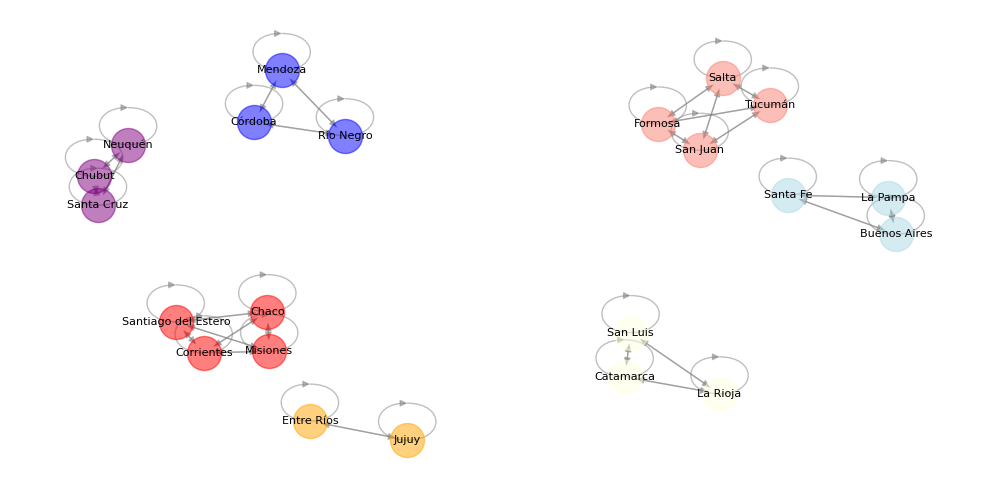

In [154]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido vacío
G = nx.DiGraph()

# Definir las relaciones
'''
relaciones = [('Santiago del Estero', 'Santiago del Estero'), ('Santiago del Estero', 'Chaco'), ('Santiago del Estero', 'Corrientes'), ('Santiago del Estero', 'Misiones'),
              ('Chaco', 'Chaco'), ('Chaco', 'Santiago del Estero'), ('Chaco', 'Corrientes'), ('Chaco', 'Misiones'),
              ('Corrientes', 'Corrientes'), ('Corrientes', 'Santiago del Estero'), ('Corrientes', 'Chaco'), ('Corrientes', 'Misiones'),
              ('Misiones', 'Misiones'), ('Misiones', 'Santiago del Estero'), ('Misiones', 'Chaco'), ('Misiones', 'Corrientes'),

              ('Tucumán', 'Tucumán'), ('Tucumán', 'San Juan'), ('Tucumán', 'Salta'), ('Tucumán', 'Formosa'),
              ('San Juan', 'San Juan'), ('San Juan', 'Tucumán'), ('San Juan', 'Salta'), ('San Juan', 'Formosa'),
              ('Salta', 'Salta'), ('Salta', 'Tucumán'), ('Salta', 'San Juan'), ('Salta', 'Formosa'),
              ('Chaco', 'Santiago del Estero'), ('Formosa', 'Tucumán'), ('Formosa', 'San Juan'), ('Formosa', 'Salta'),

              ('Entre Ríos', 'Entre Ríos'), ('Entre Ríos', 'Jujuy'),
              ('Jujuy', 'Jujuy'), ('Jujuy', 'Entre Ríos'),

              ('La Rioja', 'La Rioja'), ('La Rioja', 'Catamarca'), ('La Rioja', 'La Pampa'),
              ('Catamarca', 'Catamarca'), ('Catamarca', 'La Rioja'), ('Catamarca', 'La Pampa'),
              ('La Pampa', 'La Pampa'), ('La Pampa', 'La Rioja'), ('La Pampa', 'Catamarca'),

              ('Río Negro', 'Río Negro'), ('Río Negro', 'Mendoza'), ('Río Negro', 'Córdoba'), ('Río Negro', 'Santa Fe'),
              ('Mendoza', 'Mendoza'), ('Mendoza', 'Río Negro'), ('Mendoza', 'Córdoba'), ('Mendoza', 'Santa Fe'),
              ('Córdoba', 'Córdoba'), ('Córdoba', 'Río Negro'), ('Córdoba', 'Mendoza'), ('Córdoba', 'Santa Fe'),
              ('Santa Fe', 'Santa Fe'), ('Santa Fe', 'Río Negro'), ('Santa Fe', 'Mendoza'), ('Santa Fe', 'Córdoba'),

              ('Neuquén', 'Neuquén'), ('Neuquén', 'Santa Cruz'), ('Neuquén', 'Chubut'),
              ('Santa Cruz', 'Santa Cruz'), ('Santa Cruz', 'Neuquén'), ('Santa Cruz', 'Chubut'),
              ('Chubut', 'Chubut'), ('Chubut', 'Neuquén'), ('Chubut', 'Santa Cruz')]
'''

relaciones = producto_cartesiano

# Agregar las relaciones al grafo
G.add_edges_from(relaciones)

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 5))

# Asignar posiciones a los nodos utilizando spring_layout

# pos = nx.spectral_layout(G, scale=0.5)
# pos = nx.spectral_layout(G, dim=2, scale=0.5, center=None, weight=5)
# pos = nx.planar_layout(G)
# pos = nx.spring_layout(G, seed=35, k=1, iterations=300)
pos = nx.spring_layout(G, seed=11, k=2.75, iterations=250, scale=8, center=[1,5])

# Crear los grupos de nodos
grupo1 = ['Santiago del Estero', 'Chaco', 'Corrientes', 'Misiones']
grupo2 = ['Tucumán', 'San Juan', 'Salta', 'Formosa']
grupo3 = ['Entre Ríos', 'Jujuy',]
grupo4 = ['La Rioja', 'Catamarca', 'San Luis']
grupo5 = ['Buenos Aires', 'La Pampa', 'Santa Fe']
grupo6 = ['Río Negro', 'Mendoza', 'Córdoba']
grupo7 = ['Neuquén', 'Santa Cruz', 'Chubut']

# Dibujar los nodos de cada grupo con un color diferente
nx.draw_networkx_nodes(G, pos, nodelist=grupo1, node_color='red', node_size=600, alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=grupo2, node_color='salmon', node_size=600, alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=grupo3, node_color='orange', node_size=600, alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=grupo4, node_color='lightyellow', node_size=600, alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=grupo5, node_color='lightblue', node_size=600, alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=grupo6, node_color='blue', node_size=600, alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=grupo7, node_color='purple', node_size=600, alpha=0.5)

# Dibujar las flechas de las relaciones
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, width=1.0, alpha=0.5)

# Mostrar etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Ocultar los ejes
plt.axis('off')

# Ajustar los límites de la figura
plt.tight_layout()

# Mostrar el gráfico
plt.show()


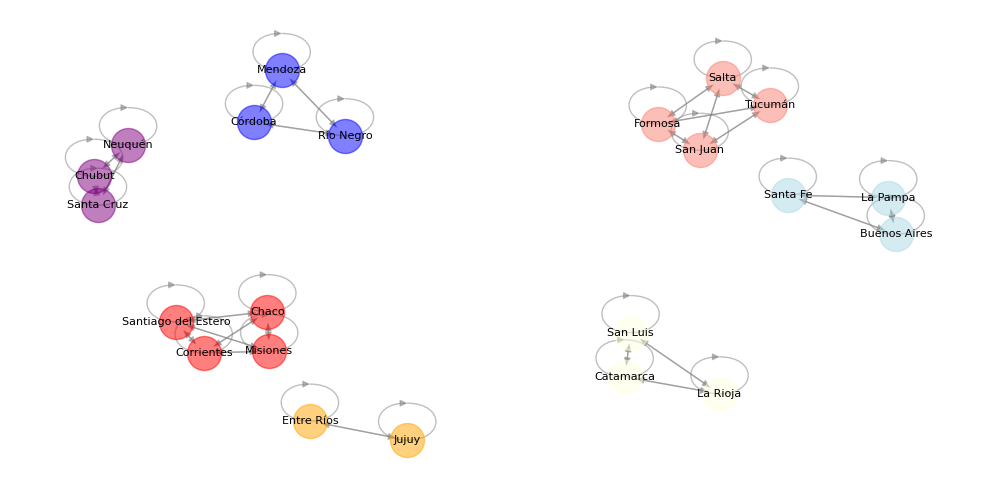

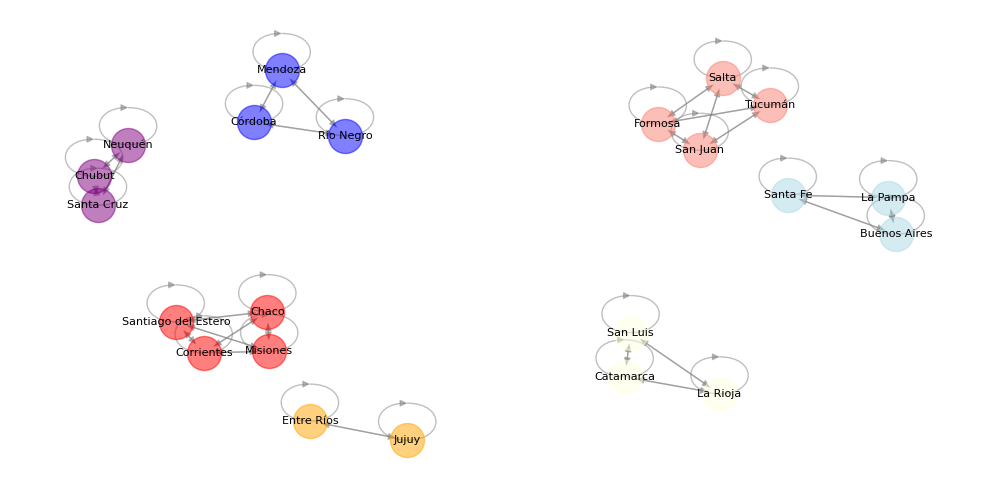

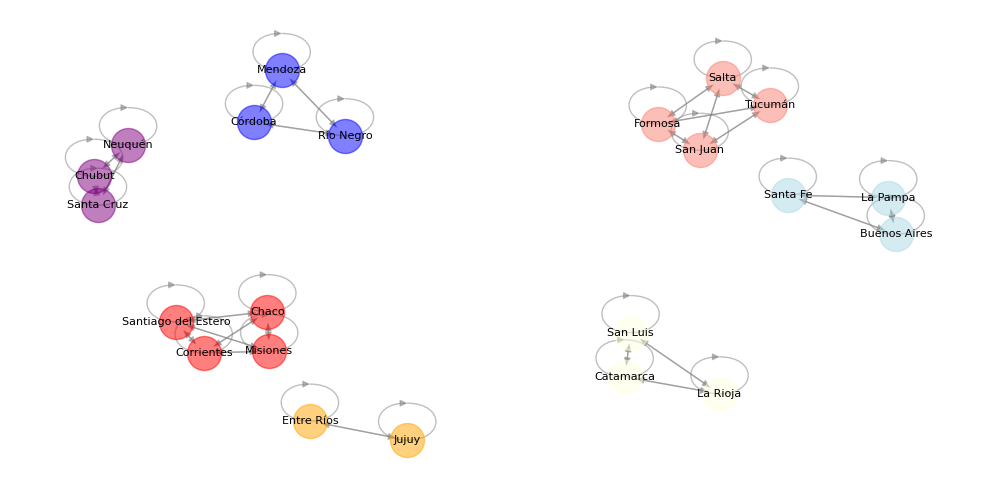

KeyboardInterrupt: ignored

In [152]:
import networkx as nx
import matplotlib.pyplot as plt

for i in range(0, 40):
  # Crear un grafo dirigido vacío
  G = nx.DiGraph()

  # Definir las relaciones
  relaciones = producto_cartesiano

  # Agregar las relaciones al grafo
  G.add_edges_from(relaciones)

  # Configurar el tamaño de la figura
  fig, ax = plt.subplots(figsize=(10, 5))

  # Asignar posiciones a los nodos utilizando spring_layout

  # pos = nx.spectral_layout(G, scale=0.5)
  # pos = nx.spectral_layout(G, dim=2, scale=0.5, center=None, weight=5)
  # pos = nx.planar_layout(G)
  # pos = nx.spring_layout(G, seed=35, k=1, iterations=300)
  pos = nx.spring_layout(G, seed=11, k=2.75, iterations=250, scale=8, center=[1,5])

  # Crear los grupos de nodos
  grupo1 = ['Santiago del Estero', 'Chaco', 'Corrientes', 'Misiones']
  grupo2 = ['Tucumán', 'San Juan', 'Salta', 'Formosa']
  grupo3 = ['Entre Ríos', 'Jujuy',]
  grupo4 = ['La Rioja', 'Catamarca', 'San Luis']
  grupo5 = ['Buenos Aires', 'La Pampa', 'Santa Fe']
  grupo6 = ['Río Negro', 'Mendoza', 'Córdoba']
  grupo7 = ['Neuquén', 'Santa Cruz', 'Chubut']

  # Dibujar los nodos de cada grupo con un color diferente
  nx.draw_networkx_nodes(G, pos, nodelist=grupo1, node_color='red', node_size=600, alpha=0.5)
  nx.draw_networkx_nodes(G, pos, nodelist=grupo2, node_color='salmon', node_size=600, alpha=0.5)
  nx.draw_networkx_nodes(G, pos, nodelist=grupo3, node_color='orange', node_size=600, alpha=0.5)
  nx.draw_networkx_nodes(G, pos, nodelist=grupo4, node_color='lightyellow', node_size=600, alpha=0.5)
  nx.draw_networkx_nodes(G, pos, nodelist=grupo5, node_color='lightblue', node_size=600, alpha=0.5)
  nx.draw_networkx_nodes(G, pos, nodelist=grupo6, node_color='blue', node_size=600, alpha=0.5)
  nx.draw_networkx_nodes(G, pos, nodelist=grupo7, node_color='purple', node_size=600, alpha=0.5)

  # Dibujar las flechas de las relaciones
  nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, width=1.0, alpha=0.5)

  # Mostrar etiquetas de los nodos
  nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

  # Ocultar los ejes
  plt.axis('off')

  # Ajustar los límites de la figura
  plt.tight_layout()

  # Mostrar el gráfico
  plt.show()

In [155]:
 # Agrupar las provincias por la penúltima columna
grupos = data.groupby('situación')['province'].apply(list)

# Obtener una lista de provincias para cada grupo
provincias_por_grupo = grupos.tolist()

In [156]:
provincias_por_grupo

[['Corrientes', 'Chaco', 'Misiones', 'Santiago del Estero'],
 ['Tucumán', 'San Juan', 'Salta', 'Formosa'],
 ['Entre Ríos', 'Jujuy'],
 ['San Luis', 'La Rioja', 'Catamarca'],
 ['Río Negro', 'Córdoba', 'Mendoza'],
 ['La Pampa', 'Santa Fe', 'Buenos Aires'],
 ['Neuquén', 'Chubut', 'Santa Cruz']]

In [164]:
zonas = {-3: 'Norte_1', -2: 'Norte_2', -1: 'Norte_3', 0: 'Sierras_Pampeanas', 1: 'Cuyo', 2: 'Pampa_Humeda', 3: 'Sur'}

# Asignar la zona correspondiente a cada fila
data['zona'] = data['situación'].map(zonas)

# Mostrar el DataFrame con la nueva columna de zona y la columna de situación
data[['zona', 'situación']]

# Agrupar los datos por zona y mostrar solo las columnas 'zona' y 'situación'
agrupado = data.groupby('zona')[['zona', 'situación']].first()

zonas = agrupado.sort_values(by='situación')

In [165]:
zonas

,zona,situación
zona,,
Norte_1,Norte_1,-3
Norte_2,Norte_2,-2
Norte_3,Norte_3,-1
Sierras_Pampeanas,Sierras_Pampeanas,0
Cuyo,Cuyo,1
Pampa_Humeda,Pampa_Humeda,2
Sur,Sur,3


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 187, in _repr_mimebundle_
    dataframe = self._preprocess_dataframe()
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 175, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 6361, in reset_index
    new_obj.insert(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 4817, in insert
    raise ValueError(f"cannot insert {column}, already exists")
ValueError: cannot insert zona, already exists
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 199, in _repr_javascript_module_
    return self._gen_js(self._preprocess_dataframe())
  Fil